# Pipeline
This is one example how to use the pipeline and generate new samples.
Please use this next to the docstrings to understand how to use the pipeline.

In [1]:
# General
import torch

# Import the models and pipeline
from models import LeNet5, CGanGenerator
from pipeline import generate_samples_with_iterative_epsilons

### Variables
Following are variables are used for the pipeline:
- CLASSIFIER: The classifier $C$ that will be used by the pipeline. The pipeline takes either the whole model, that path to the model-file or the path to the models weights-file.
- GENERATOR: The classifier $G$ that will be used by the pipeline. The pipeline takes either the whole model, that path to the model-file or the path to the models weights-file.
- N_GENERATED_SAMPLES: The number of samples to generate.
- N_TIMEOUT: The number of trials before continue to higher epsilon.

In [2]:
# Set random seed for reproducibility
torch.manual_seed(0)

# Get the device for cuda optimization
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the classifier
# The path to the classifier, that will be used by the pipeline. It can be a path to the models weights or the model will be passed directly.
CLASSIFIER_STATE_DICT_PATH = r"models\state_dicts\lenet5.pt"
classifier = LeNet5()
classifier.load_state_dict(torch.load(CLASSIFIER_STATE_DICT_PATH))
classifier.to(DEVICE)

# Load the Generator
# The path to the generator, that will be used by the pipeline. It can be a path to the models weights or the model will be passed directly.
GENERATOR_STATE_DICT_PATH = r"models\state_dicts\conditional_gan_generator.pt"
generator = CGanGenerator(100, (1,28,28))
generator.load_state_dict(torch.load(GENERATOR_STATE_DICT_PATH))
generator.to(DEVICE)

# Number of samples to generate
N_GENERATED_SAMPLES=25

# Number of trials per epsilon before algorithm continues with higher perturbation or time out
N_TIMEOUT = 1000

## Generate samples

In [4]:
classifier, generator, (z, y, per_z, per_y) = generate_samples_with_iterative_epsilons_by_config(cfg)
x, per_x = generator(z).detach().cpu(), generator(per_z).detach().cpu()
print(f"Generated {len(z)} adversarial samples with generator")

Generated 100 adversarial samples with fgsm
Try to generate 100 samples with epsilon = 0.1
Timeout (1000) reached. 1 images returned.
Generated 1 samples
Try to generate 99 samples with epsilon = 0.15
Timeout (1000) reached. 2 images returned.
Generated 2 samples
Try to generate 97 samples with epsilon = 0.2
Timeout (1000) reached. 5 images returned.
Generated 5 samples
Try to generate 92 samples with epsilon = 0.25
Timeout (1000) reached. 13 images returned.
Generated 13 samples
Try to generate 79 samples with epsilon = 0.3
Timeout (1000) reached. 20 images returned.
Generated 20 samples
Try to generate 59 samples with epsilon = 0.35
Timeout (1000) reached. 39 images returned.
Generated 39 samples
Try to generate 20 samples with epsilon = 0.4
Generated 20 samples
Generated 100 adversarial samples with generator


## Display Results

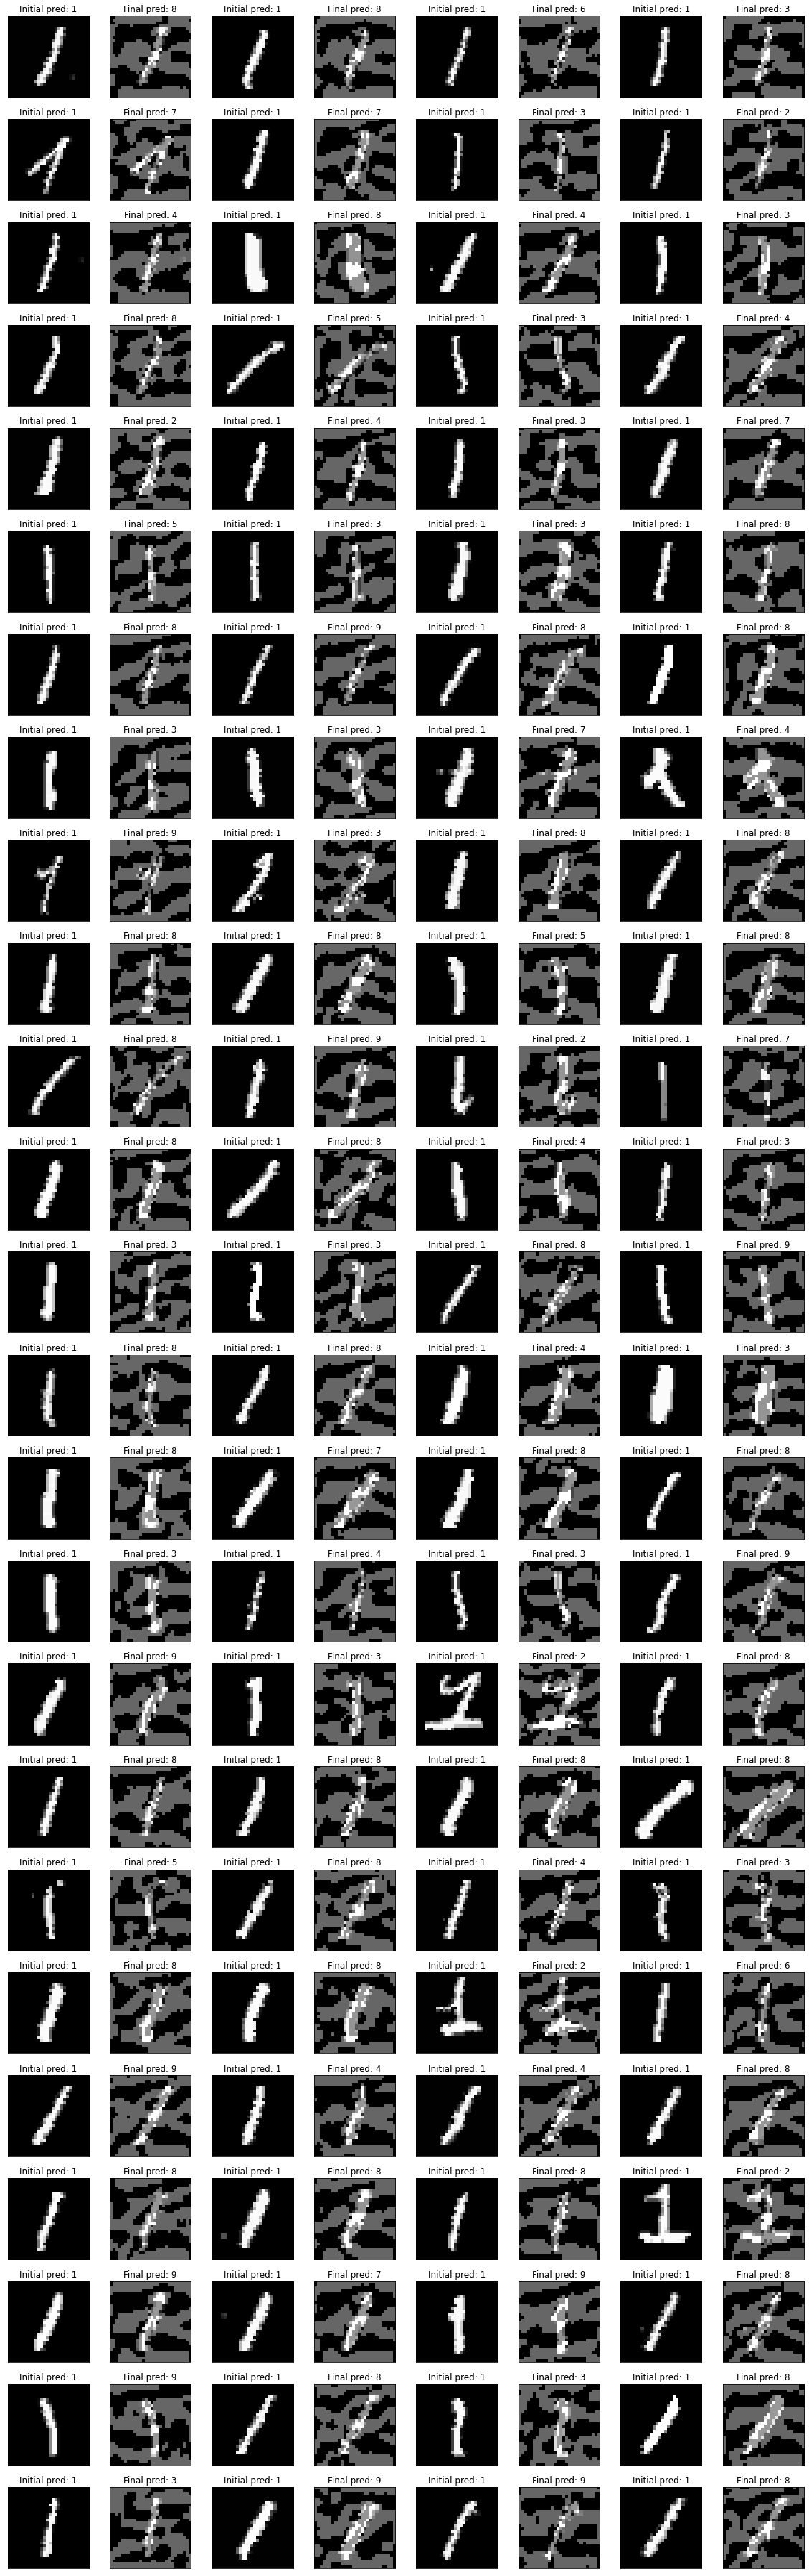

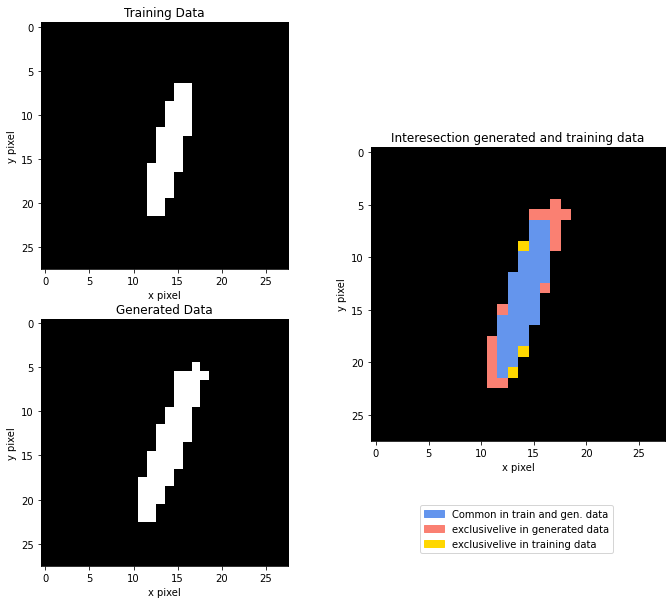

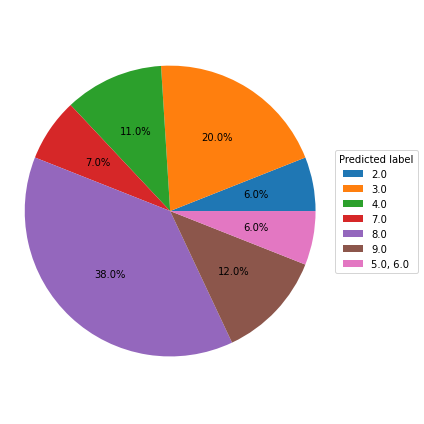

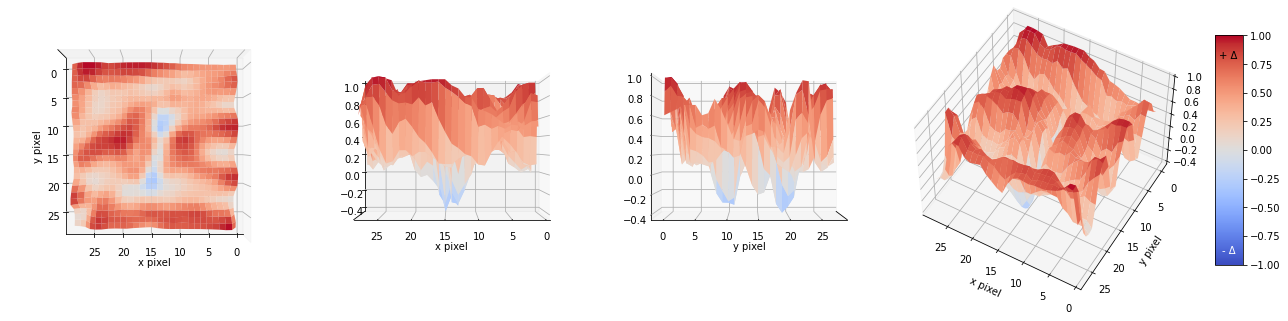

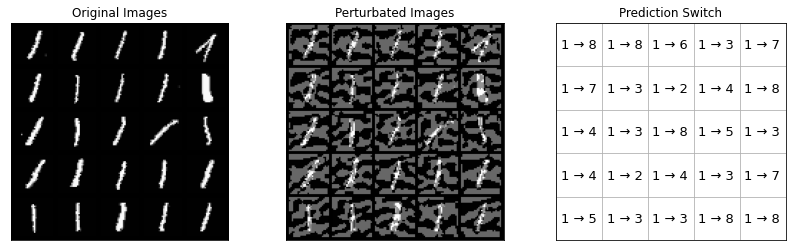

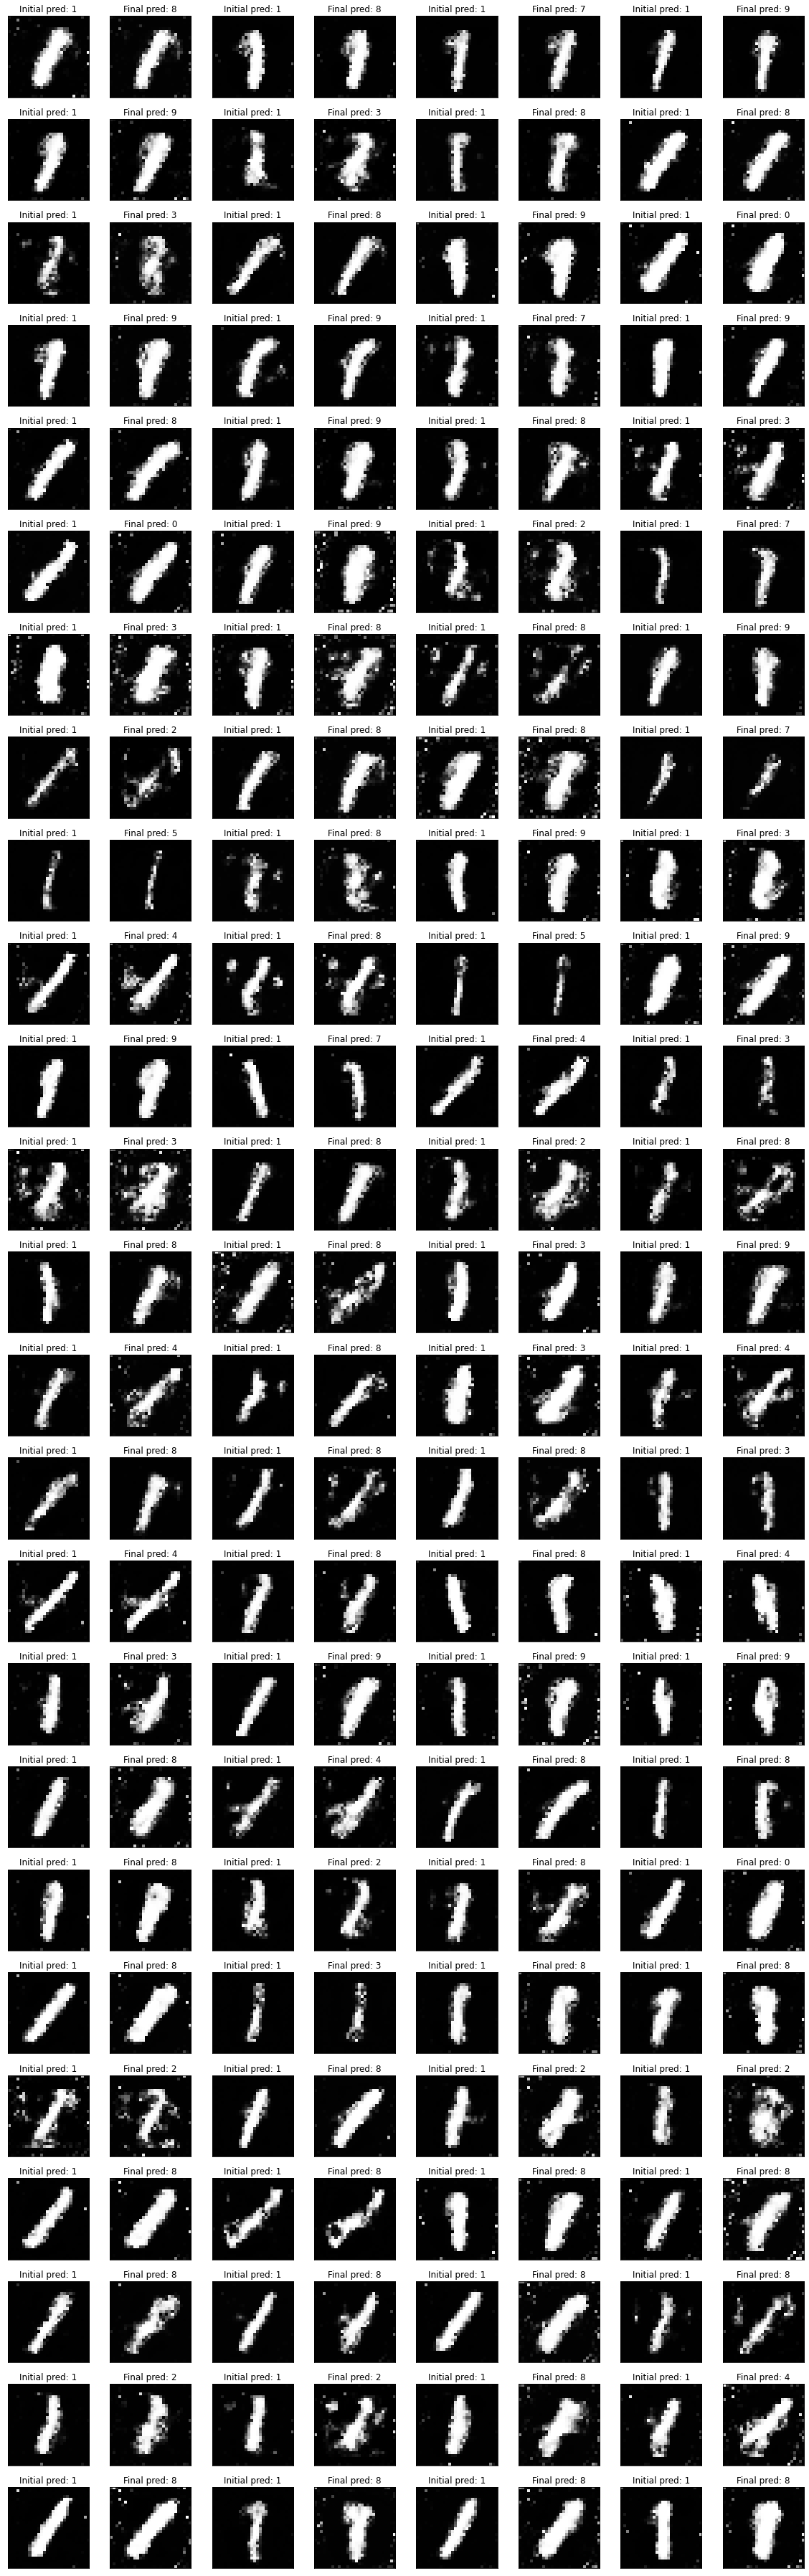

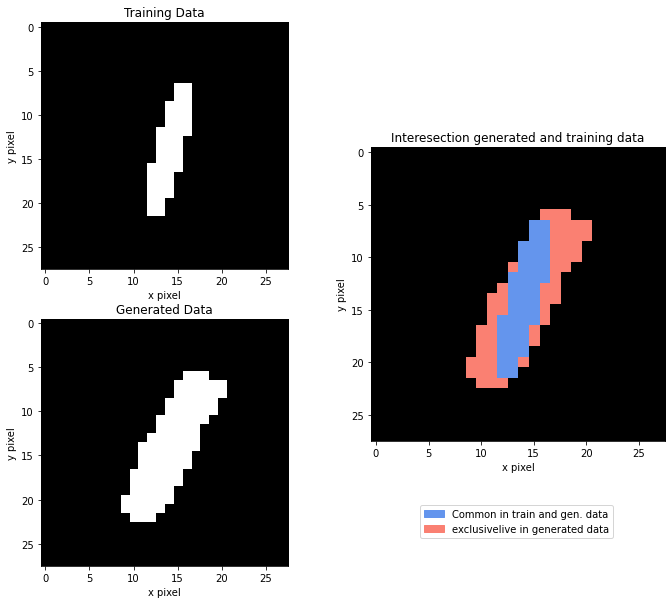

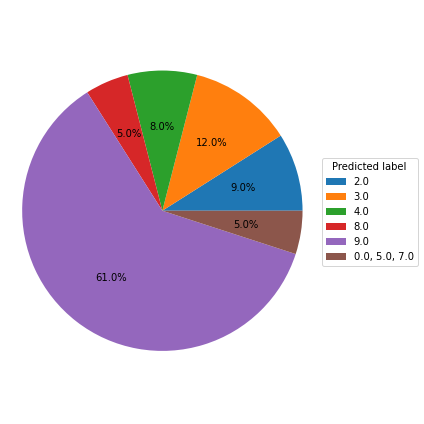

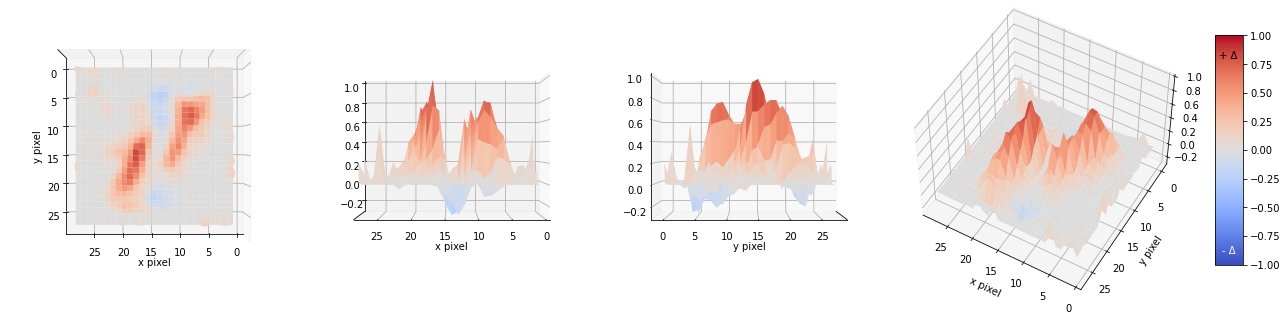

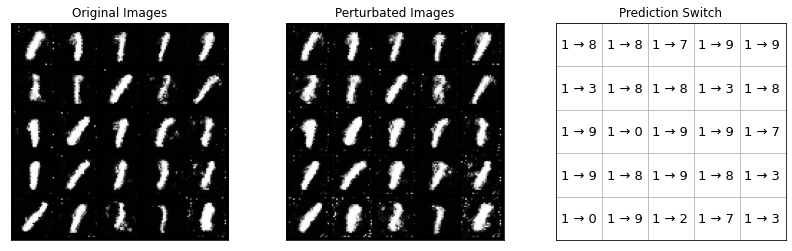

In [5]:
fgsm_plots = generate_plots(fgsm_data, fgsm_y, per_fgsm_data, per_fgsm_y, cfg.target, tds, shape, cfg.dataset.name)
generator_plots = generate_plots(x, y, per_x, per_y, cfg.target, tds, shape, cfg.dataset.name)